# Load Dataset

In [1]:
import pandas as pd

data = pd.read_csv("athletes.csv")
display(data)

,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,snatch,deadlift,backsq,pullups,eat,train,background,experience,schedule,howlong
0,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,NaN,400.0,305.0,NaN,NaN,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|
1,3517.0,Derek Abdella,NaN,NaN,NaN,Male,42.0,70.0,190.0,NaN,...,NaN,NaN,NaN,NaN,NaN,I have a coach who determines my programming|I...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|
2,4691.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5164.0,Abo Brandon,Southern California,LAX CrossFit,LAX CrossFit,Male,40.0,67.0,NaN,211.0,...,200.0,375.0,325.0,25.0,I eat 1-3 full cheat meals per week|,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|,4+ years|
4,5286.0,Bryce Abbey,NaN,NaN,NaN,Male,32.0,65.0,149.0,206.0,...,150.0,NaN,325.0,50.0,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|I inc...,I played college sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|I strictly s...,1-2 years|
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423001,574489.0,Odo Renata,Latin America,Team Guarujá Inox,CrossFit Guaruja,Female,36.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
423002,585696.0,Lozzie Trevor,Australia,FBP CrossFit Games Team,FBP CrossFit,Female,27.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
423003,608828.0,Marisol Smith,North West,CrossFit Oak Harbor,CrossFit Oak Harbor,Female,44.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
423004,628881.0,Pedrini Morgane,Europe,NaN,CrossFit 67,Female,20.0,64.0,61.0,NaN,...,NaN,80.0,143.0,NaN,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|,NaN,I began CrossFit with a coach (e.g. at an affi...,I usually only do 1 workout a day|I strictly s...,6-12 months|


## Commit to gitLFS

In [2]:
import gitlfs_wrapper

gitlfs_wrapper.commit_dataframe(data, version=1)

The following paths are ignored by one of your .gitignore files:
data/dataset_v1.csv
hint: Use -f if you really want to add them.
hint: Turn this message off by running
hint: "git config advice.addIgnoredFile false"


[main 9e40b79] Add dataset version 1
 5 files changed, 3962 insertions(+), 1971 deletions(-)
 create mode 100644 .gitattributes
 delete mode 100644 assignment_1.ipynb
 create mode 100644 gitlfs.ipynb
 create mode 100644 gitlfs_wrapper.py
 create mode 100644 lakefs.ipynb


To github.com:brandt-buchda/adsp_32021_assignment_1.git
   55fa7f7..9e40b79  main -> main
 * [new tag]         v1 -> v1


# Clean dataset

In [3]:
import numpy as np

# Remove not relevant columns
data = data.dropna(subset=['region','age','weight','height','howlong','gender','eat',
                           'train','background','experience','schedule','howlong',
                           'deadlift','candj','snatch','backsq','experience',
                           'background','schedule','howlong'])
data = data.drop(columns=['affiliate','team','name','athlete_id','fran','helen','grace',
                          'filthy50','fgonebad','run400','run5k','pullups','train'])

# Remove Outliers
data = data[data['weight'] < 1500]
data = data[data['gender'] != '--']
data = data[data['age'] >= 18]
data = data[(data['height'] < 96) & (data['height'] > 48)]

data = data[(data['deadlift'] > 0) & (data['deadlift'] <= 1105)|((data['gender'] == 'Female')
             & (data['deadlift'] <= 636))]
data = data[(data['candj'] > 0) & (data['candj'] <= 395)]
data = data[(data['snatch'] > 0) & (data['snatch'] <= 496)]
data = data[(data['backsq'] > 0) & (data['backsq'] <= 1069)]

# Clean Survey Data
decline_dict = {'Decline to answer|': np.nan}
data = data.replace(decline_dict)
data = data.dropna(subset=['background','experience','schedule','howlong','eat'])

## Commit to LakeFS

In [4]:
import gitlfs_wrapper

gitlfs_wrapper.commit_dataframe(data, version=2)

The following paths are ignored by one of your .gitignore files:
data/dataset_v2.csv
hint: Use -f if you really want to add them.
hint: Turn this message off by running
hint: "git config advice.addIgnoredFile false"


On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   gitlfs.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


To github.com:brandt-buchda/adsp_32021_assignment_1.git
 * [new tag]         v2 -> v2


# Prepare Datasets

## V1

In [5]:
data = gitlfs_wrapper.load_dataframe(version=1)
display(data.head())

Note: switching to 'v1'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 9e40b79 Add dataset version 1


M	gitlfs.ipynb


,athlete_id,name,region,team,affiliate,gender,age,height,weight,fran,...,snatch,deadlift,backsq,pullups,eat,train,background,experience,schedule,howlong
0,2554.0,Pj Ablang,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,...,NaN,400.0,305.0,NaN,NaN,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|
1,3517.0,Derek Abdella,NaN,NaN,NaN,Male,42.0,70.0,190.0,NaN,...,NaN,NaN,NaN,NaN,NaN,I have a coach who determines my programming|I...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|
2,4691.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5164.0,Abo Brandon,Southern California,LAX CrossFit,LAX CrossFit,Male,40.0,67.0,NaN,211.0,...,200.0,375.0,325.0,25.0,I eat 1-3 full cheat meals per week|,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|,4+ years|
4,5286.0,Bryce Abbey,NaN,NaN,NaN,Male,32.0,65.0,149.0,206.0,...,150.0,NaN,325.0,50.0,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|I inc...,I played college sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|I strictly s...,1-2 years|


In [6]:
import numpy as np
lifts = ["candj", "snatch", "deadlift", "backsq"]

X_v1 = data
y_v1 = np.sum(data[lifts], axis=1)

In [7]:
from sklearn.model_selection import train_test_split

X_v1_train, X_v1_test, y_v1_train, y_v1_test = train_test_split(X_v1, y_v1, test_size=0.2)

## V2

In [8]:
data = gitlfs_wrapper.load_dataframe(version=2)
display(data.head())

M	gitlfs.ipynb


HEAD is now at 9e40b79 Add dataset version 1


,region,gender,age,height,weight,candj,snatch,deadlift,backsq,eat,background,experience,schedule,howlong
0,Southern California,Male,30.0,71.0,200.0,235.0,175.0,385.0,315.0,I eat whatever is convenient|,I played youth or high school level sports|I p...,I began CrossFit by trying it alone (without a...,I do multiple workouts in a day 1x a week|I ty...,1-2 years|
1,Africa,Male,28.0,70.0,176.0,187.0,134.0,335.0,254.0,I eat 1-3 full cheat meals per week|,I have no athletic background besides CrossFit|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 1x a week|,2-4 years|
2,North East,Male,35.0,68.0,225.0,285.0,205.0,440.0,405.0,I eat quality foods but don't measure the amount|,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I typically rest 4 or more days per month|,2-4 years|
3,North Central,Male,36.0,71.0,199.0,267.0,212.0,485.0,390.0,I eat quality foods but don't measure the amount|,I played youth or high school level sports|I p...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 3+ times a wee...,1-2 years|
4,North East,Male,36.0,64.0,155.0,245.0,180.0,415.0,385.0,I eat strict Paleo|,I played youth or high school level sports|I p...,I began CrossFit by trying it alone (without a...,I do multiple workouts in a day 2x a week|I st...,4+ years|


In [9]:
X_v2 = data
y_v2 = np.sum(data[lifts], axis=1)

In [10]:
X_v2_train, X_v2_test, y_v2_train, y_v2_test = train_test_split(X_v2, y_v2, test_size=0.2)

# V1 EDA

In [11]:
display(X_v1_train.describe())

,athlete_id,age,height,weight,fran,helen,grace,filthy50,fgonebad,run400,run5k,candj,snatch,deadlift,backsq,pullups
count,338402.000000,264906.000000,1.280230e+05,184073.000000,4.449200e+04,2.434800e+04,3.268000e+04,1.553900e+04,2.381700e+04,1.790300e+04,2.905800e+04,8.364700e+04,7.784700e+04,9.237500e+04,8.851400e+04,4.056900e+04
mean,292739.700989,32.518580,1.336440e+02,170.922259,9.569954e+02,1.002168e+03,6.479044e+02,2.252869e+03,1.376533e+03,6.203690e+02,3.597632e+03,2.886381e+02,2.651786e+02,6.968135e+02,5.688127e+02,5.322971e+04
std,184965.495087,7.733117,2.344458e+04,62.742164,6.982743e+04,5.386647e+04,5.454945e+04,6.758317e+04,9.436457e+04,6.274442e+04,1.305771e+05,2.900394e+04,3.027793e+04,5.519756e+04,4.891862e+04,1.066197e+07
min,82.000000,13.000000,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,-6.000000e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-4.500000e+01,0.000000e+00,-5.000000e+02,0.000000e+00,-6.000000e+00
25%,135059.250000,27.000000,6.600000e+01,145.000000,2.150000e+02,5.240000e+02,1.490000e+02,1.306000e+03,2.390000e+02,6.200000e+01,1.244000e+03,1.400000e+02,1.050000e+02,2.550000e+02,2.050000e+02,1.500000e+01
50%,275865.000000,31.000000,6.900000e+01,170.000000,2.900000e+02,5.940000e+02,1.930000e+02,1.550000e+03,2.940000e+02,7.100000e+01,1.380000e+03,1.950000e+02,1.450000e+02,3.450000e+02,2.750000e+02,2.700000e+01
75%,473241.500000,37.000000,7.200000e+01,192.000000,3.930000e+02,6.940000e+02,2.620000e+02,1.809000e+03,3.360000e+02,8.400000e+01,1.560000e+03,2.350000e+02,1.850000e+02,4.150000e+02,3.350000e+02,4.000000e+01
max,632958.000000,125.000000,8.388607e+06,20175.000000,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,8.388607e+06,2.147484e+09


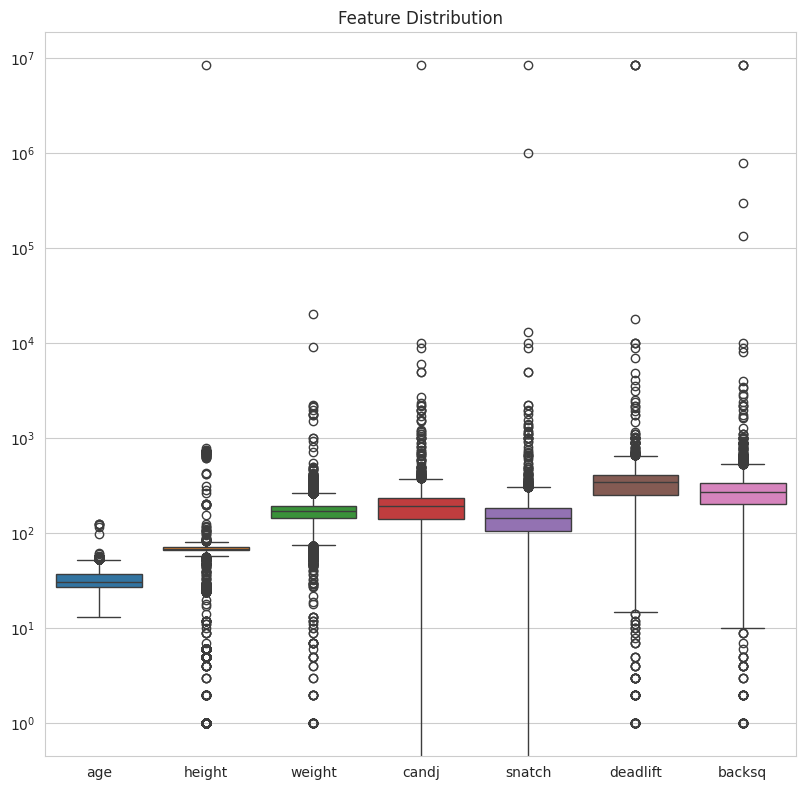

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))
sns.boxplot(data=X_v1_train[data.select_dtypes(include=np.number).columns])
plt.title("Feature Distribution")
plt.tight_layout()
plt.yscale('log')
plt.show()

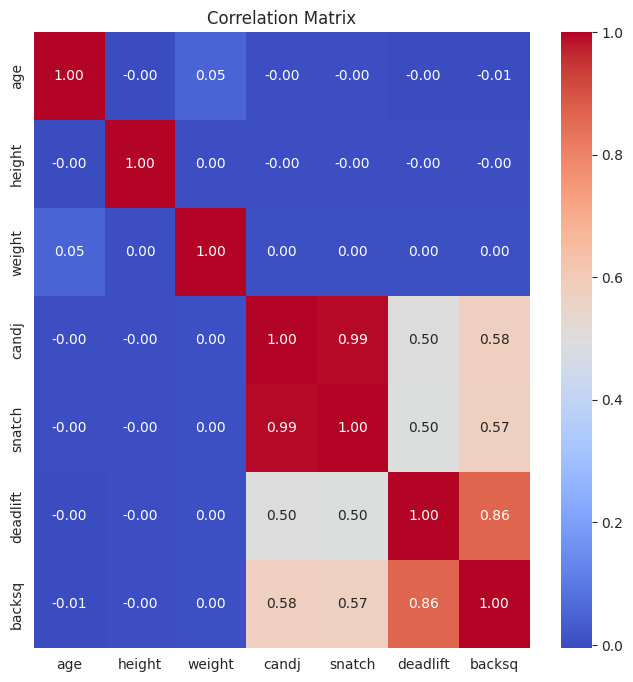

In [13]:
corr = X_v1_train[data.select_dtypes(include=np.number).columns].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# V1 Pipeline

In [14]:
import pandas as pd
import numpy as np
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

categorical_cols = ["region", "eat", "background", "experience", "schedule", "gender", "howlong"]
numerical_cols = ["age", "weight", "height"]

preprocessor = ColumnTransformer(
    transformers=[
        ("scale", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols)
    ],
)

model = make_pipeline(preprocessor, HistGradientBoostingRegressor())

In [15]:
model.fit(X_v1_train, y_v1_train)
predictions = model.predict(X_v1_test)

# V1 Metrics

In [16]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error

rmse = root_mean_squared_error(y_v1_test, predictions)
mape = mean_absolute_percentage_error(y_v1_test, predictions)
print("RMSE:", rmse)
print("MAPE:", mape)

RMSE: 57892.3018422504
MAPE: 8.279083674627013e+17


# V2 EDA

In [17]:
display(X_v2_train.describe())

,age,height,weight,candj,snatch,deadlift,backsq
count,24023.000000,24023.000000,24023.000000,24023.000000,24023.000000,24023.000000,24023.000000
mean,32.137452,68.882155,177.073097,205.451942,156.185031,362.023977,294.116097
std,7.441365,3.779138,32.491590,58.710969,48.820531,96.778117,85.130270
min,18.000000,53.000000,5.000000,1.000000,1.000000,0.000000,1.000000
25%,27.000000,66.000000,155.000000,160.000000,120.000000,287.000000,225.000000
50%,31.000000,69.000000,178.000000,205.000000,155.000000,375.000000,300.000000
75%,37.000000,72.000000,197.000000,245.000000,190.000000,435.000000,355.000000
max,56.000000,83.000000,474.000000,390.000000,386.000000,1000.000000,882.000000


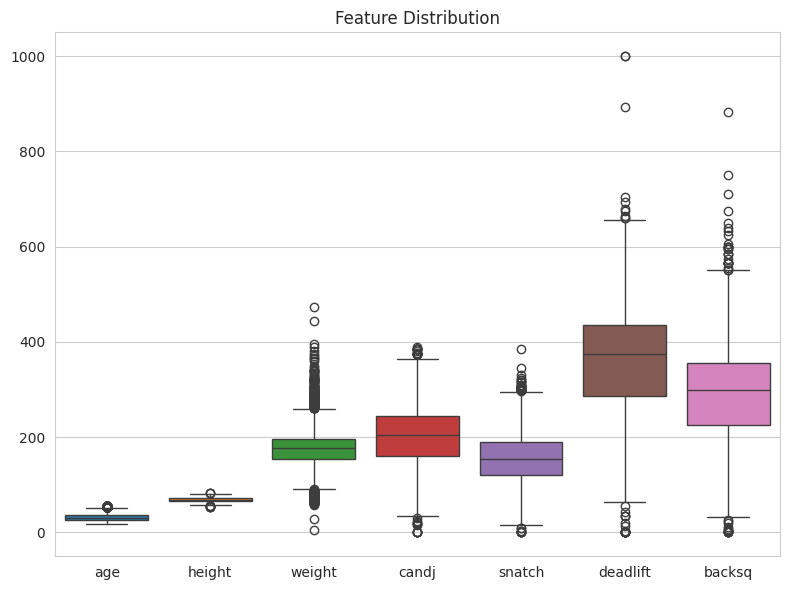

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(data=X_v2_train)
plt.title("Feature Distribution")
plt.tight_layout()
plt.show()

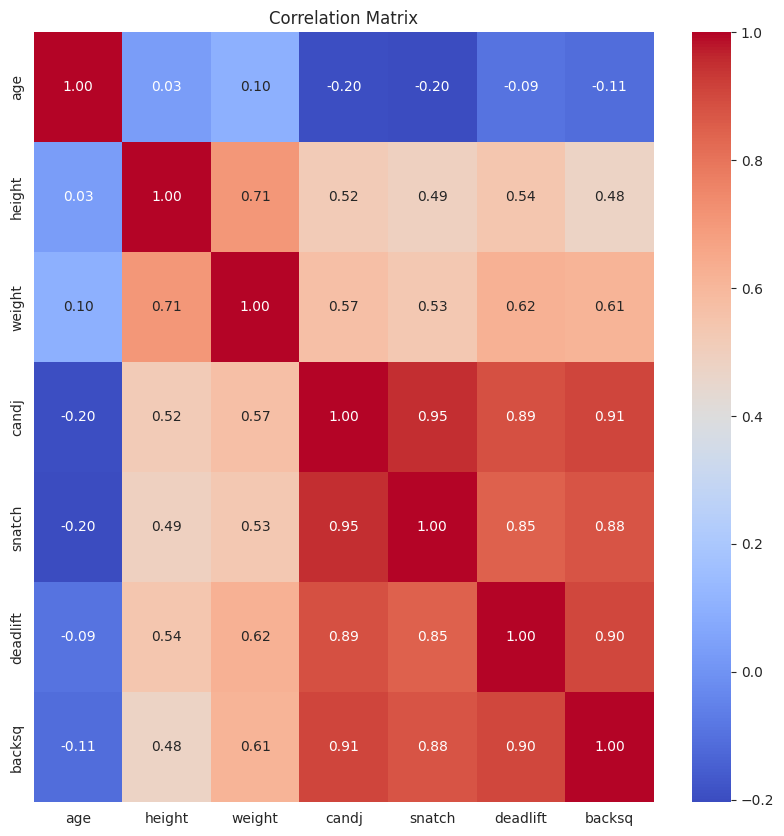

In [19]:
corr = X_v2_train[data.select_dtypes(include=np.number).columns].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# V2 Pipeline

In [20]:
model.fit(X_v2_train, y_v2_train)
predictions = model.predict(X_v2_test)

# V2 Metrics

In [21]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error
rmse = root_mean_squared_error(y_v2_test, predictions)
mape = mean_absolute_percentage_error(y_v2_test, predictions)
print("RMSE:", rmse)
print("MAPE:", mape)

RMSE: 140.95827581533743
MAPE: 0.1984196816394878


# Compute DP

In [22]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from opacus import PrivacyEngine

preprocessor = ColumnTransformer(
    transformers=[
        ("scale", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols)
    ]
)

# Transform data
X_train_transformed = preprocessor.fit_transform(X_v2_train)
X_test_transformed = preprocessor.transform(X_v2_test)

# Convert to tensors (fixed version)
X_train_tensor = torch.tensor(X_train_transformed, dtype=torch.float32)
y_train_tensor = torch.tensor(y_v2_train.to_numpy(), dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test_transformed, dtype=torch.float32)
y_test_tensor = torch.tensor(y_v2_test.to_numpy(), dtype=torch.float32).view(-1, 1)

# Create datasets and loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
# Create datasets and loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Define PyTorch model
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize model
input_dim = X_train_transformed.shape[1]
model = RegressionModel(input_dim)

# Set up optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.005)

# Make model differentially private
privacy_engine = PrivacyEngine()
model, optimizer, train_loader = privacy_engine.make_private(
    module=model,
    optimizer=optimizer,
    data_loader=train_loader,
    noise_multiplier=1.1,
    max_grad_norm=1.0,
)

# Training loop
criterion = nn.MSELoss()
num_epochs = 25
for epoch in range(num_epochs):
    model.train()
    for batch in train_loader:
        X, y = batch
        optimizer.zero_grad()
        output = model(X)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

/home/ubuntu/.virtualenvs/pytorch/lib/python3.12/site-packages/opacus/privacy_engine.py:96: UserWarning: Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_mode`` turned on.
  warnings.warn(


Epoch 1/25, Loss: 1190197.125
Epoch 2/25, Loss: 981532.3125
Epoch 3/25, Loss: 863580.1875
Epoch 4/25, Loss: 454524.96875
Epoch 5/25, Loss: 142524.125
Epoch 6/25, Loss: 75612.796875
Epoch 7/25, Loss: 75113.4375
Epoch 8/25, Loss: 69274.921875
Epoch 9/25, Loss: 29333.396484375
Epoch 10/25, Loss: 32207.408203125
Epoch 11/25, Loss: 81564.8515625
Epoch 12/25, Loss: 49312.26953125
Epoch 13/25, Loss: 38326.7421875
Epoch 14/25, Loss: 29356.7265625
Epoch 15/25, Loss: 29545.125
Epoch 16/25, Loss: 37002.67578125
Epoch 17/25, Loss: 19833.44140625
Epoch 18/25, Loss: 19662.296875
Epoch 19/25, Loss: 26294.0625
Epoch 20/25, Loss: 15652.37109375
Epoch 21/25, Loss: 29942.509765625
Epoch 22/25, Loss: 22888.734375
Epoch 23/25, Loss: 19484.005859375
Epoch 24/25, Loss: 30202.599609375
Epoch 25/25, Loss: 26254.560546875


# Metrics

In [23]:
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    predictions_np = predictions.numpy()
    y_test_np = y_test_tensor.numpy()
    rmse = root_mean_squared_error(y_test_np, predictions_np)
    mape = mean_absolute_percentage_error(y_test_np, predictions_np)
    print(f"RMSE: {rmse}")
    print(f"MAPE: {mape}")

epsilon = privacy_engine.accountant.get_epsilon(delta=1e-5)
print(f"Epsilon: {epsilon}")

RMSE: 159.16868591308594
MAPE: 0.21167834103107452
Epsilon: 0.7794011274190993
